In [173]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Loading the Excel file into a pandas DataFrame.
df = pd.read_excel('/content/Copy of Task 2.xlsx')

# Printing the DataFrame.
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [175]:
# Dropping column containing all null values
df.drop(['CAMPAIGN_NBR'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [155]:
# Function to describe a column
def describe_column(column_name):

    data_type = df[column_name].dtype
    unique_values = df[column_name].nunique()
    distribution = "Skewed"  # Assuming most columns have skewed distributions
    significance = ""

    # Determining significance based on column name (basic examples)
    if column_name in ['REPAIR_DATE', 'REPAIR_AGE']:
        significance = "Track trends in repair frequency and identify potential issues over time."
    elif column_name in ['CAUSAL_PART_NM', 'COMPLAINT_CD']:
        significance = "Identify common failure points and areas for improvement in design and manufacturing."
    elif column_name in ['DEALER_NAME', 'REPAIR_DLR_CITY']:
        significance = "Evaluate dealer performance and identify potential regional issues."

    return f"**{column_name}:**\n" \
           f"  - Data Type: {data_type}\n" \
           f"  - Unique Values: {unique_values}\n" \
           f"  - Distribution: {distribution}\n" \
           f"  - Significance: {significance}\n"

# Describing all columns
for column_name in df.columns:
    print(describe_column(column_name))

**VIN:**
  - Data Type: object
  - Unique Values: 98
  - Distribution: Skewed
  - Significance: 

**TRANSACTION_ID:**
  - Data Type: int64
  - Unique Values: 32
  - Distribution: Skewed
  - Significance: 

**CORRECTION_VERBATIM:**
  - Data Type: object
  - Unique Values: 93
  - Distribution: Skewed
  - Significance: 

**CUSTOMER_VERBATIM:**
  - Data Type: object
  - Unique Values: 100
  - Distribution: Skewed
  - Significance: 

**REPAIR_DATE:**
  - Data Type: datetime64[ns]
  - Unique Values: 29
  - Distribution: Skewed
  - Significance: Track trends in repair frequency and identify potential issues over time.

**CAUSAL_PART_NM:**
  - Data Type: object
  - Unique Values: 18
  - Distribution: Skewed
  - Significance: Identify common failure points and areas for improvement in design and manufacturing.

**GLOBAL_LABOR_CODE_DESCRIPTION:**
  - Data Type: object
  - Unique Values: 4
  - Distribution: Skewed
  - Significance: 

**PLATFORM:**
  - Data Type: object
  - Unique Values: 11
  - D

In [156]:
from sklearn.impute import SimpleImputer


# Identifying columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Define imputation strategies for different data types
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

# Imputing missing values based on data type
for column in columns_with_missing_values:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column] = imputer_mean.fit_transform(df[[column]])
    elif pd.api.types.is_categorical_dtype(df[column]):
        df[column] = imputer_most_frequent.fit_transform(df[[column]])
    else:
        # Handle other data types (e.g., dates, strings) appropriately
        # For example, you could use forward/backward fill or more sophisticated methods
        pass


# Checking for remaining missing values
print(df.isnull().sum())

# Proceeding with further analysis

VIN                               0
TRANSACTION_ID                    0
CORRECTION_VERBATIM               0
CUSTOMER_VERBATIM                 0
REPAIR_DATE                       0
CAUSAL_PART_NM                    5
GLOBAL_LABOR_CODE_DESCRIPTION     0
PLATFORM                          0
BODY_STYLE                        0
VPPC                              0
PLANT                             1
BUILD_COUNTRY                     0
LAST_KNOWN_DLR_NAME               0
LAST_KNOWN_DLR_CITY               0
REPAIRING_DEALER_CODE             0
DEALER_NAME                       0
REPAIR_DLR_CITY                   0
STATE                             2
DEALER_REGION                     0
REPAIR_DLR_POSTAL_CD              2
REPAIR_AGE                        0
KM                                0
COMPLAINT_CD_CSI                  0
COMPLAINT_CD                      0
VEH_TEST_GRP                      2
COUNTRY_SALE_ISO                  0
ORD_SELLING_SRC_CD                0
OPTN_FAMLY_CERTIFICATION    

In [157]:
# Dropping null rows from data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            70 non-null     object        
 1   TRANSACTION_ID                 70 non-null     int64         
 2   CORRECTION_VERBATIM            70 non-null     object        
 3   CUSTOMER_VERBATIM              70 non-null     object        
 4   REPAIR_DATE                    70 non-null     datetime64[ns]
 5   CAUSAL_PART_NM                 70 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  70 non-null     object        
 7   PLATFORM                       70 non-null     object        
 8   BODY_STYLE                     70 non-null     object        
 9   VPPC                           70 non-null     object        
 10  PLANT                          70 non-null     object        
 11  BUILD_COUNTRY             

In [158]:
# Converting to correct datatype
df["ENGINE_SOURCE_PLANT"] = pd.to_numeric(df["ENGINE_SOURCE_PLANT"], errors="coerce")
df.dropna(inplace=True)
df["ENGINE_SOURCE_PLANT"] = df["ENGINE_SOURCE_PLANT"].astype(int)
df['ENGINE_SOURCE_PLANT']

,ENGINE_SOURCE_PLANT
0,70628511
1,70628511
4,830107152
5,812040194
6,830107152
...,...
92,812040194
93,37749264
94,249196973
95,37749264


In [159]:
# Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            66 non-null     object        
 1   TRANSACTION_ID                 66 non-null     int64         
 2   CORRECTION_VERBATIM            66 non-null     object        
 3   CUSTOMER_VERBATIM              66 non-null     object        
 4   REPAIR_DATE                    66 non-null     datetime64[ns]
 5   CAUSAL_PART_NM                 66 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  66 non-null     object        
 7   PLATFORM                       66 non-null     object        
 8   BODY_STYLE                     66 non-null     object        
 9   VPPC                           66 non-null     object        
 10  PLANT                          66 non-null     object        
 11  BUILD_COUNTRY             

In [160]:
# Exporting cleaned data
df.to_excel('cleaned_vehicle_data.xlsx', index=False)

**5 Most Important Columns**

Here are the top 5 critical columns for stakeholders:

- VIN (Vehicle Identification Number): Unique identifier for each vehicle, crucial for tracking repair history and warranty claims specific to a vehicle.

- Repair Date: Essential for understanding the timeline of repairs and potential trends in issues or recalls over time.

- Causal Part Name: Identifies the specific part causing the issue, key for pinpointing recurring problems, identifying quality control issues, and assessing parts' durability.

- Repairing Dealer Name and City: Helps evaluate dealer performance, identify regions with high repair rates, and monitor customer service consistency across locations.

- Total Cost: Critical for budgeting, analyzing repair expenditures, and assessing the financial impact of specific issues, parts, or dealer performance.

These columns provide actionable insights into vehicle issues, repair trends, and cost analysis.

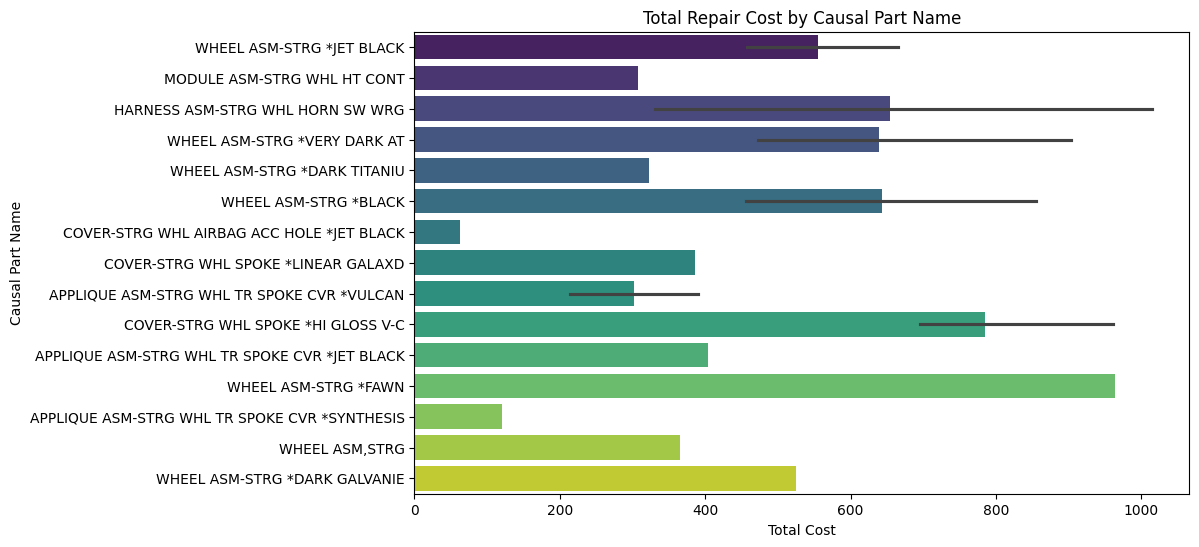

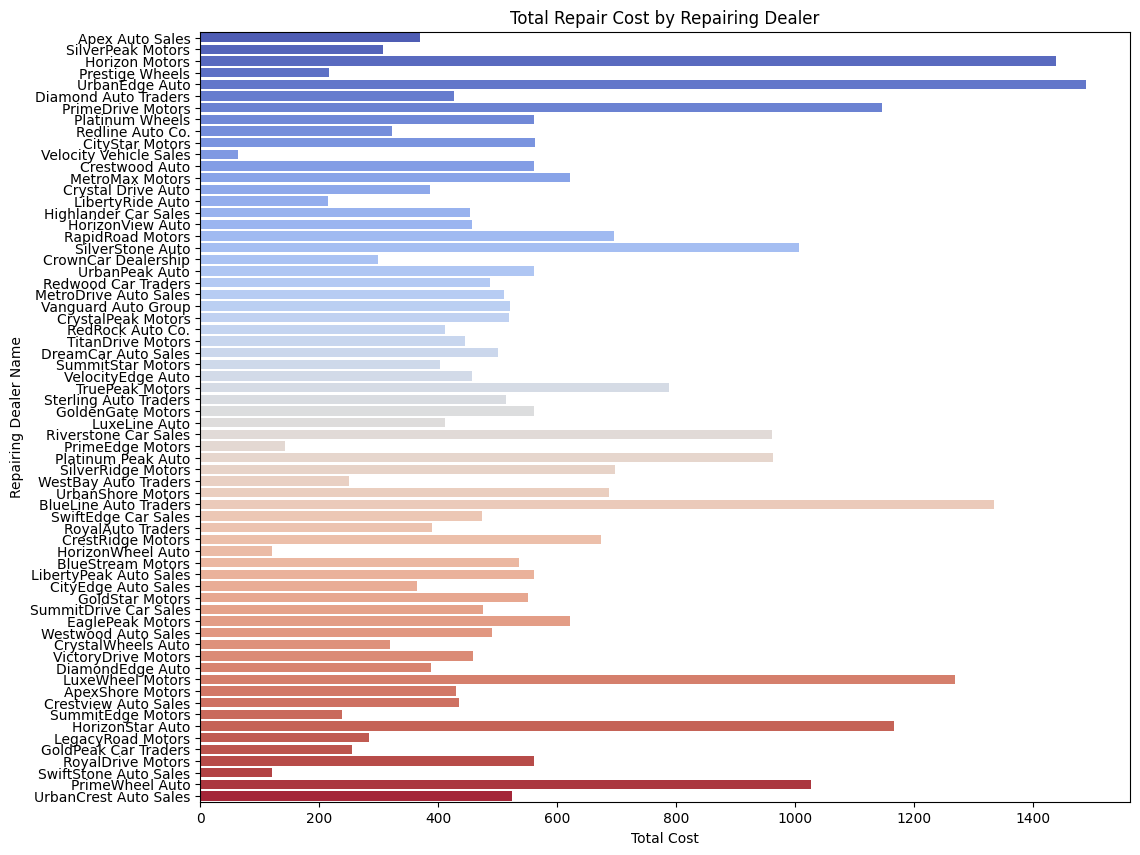

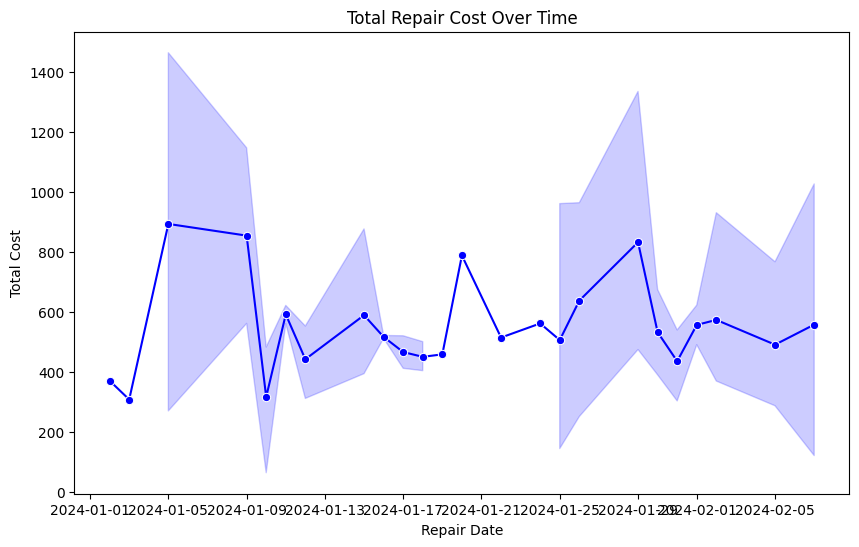

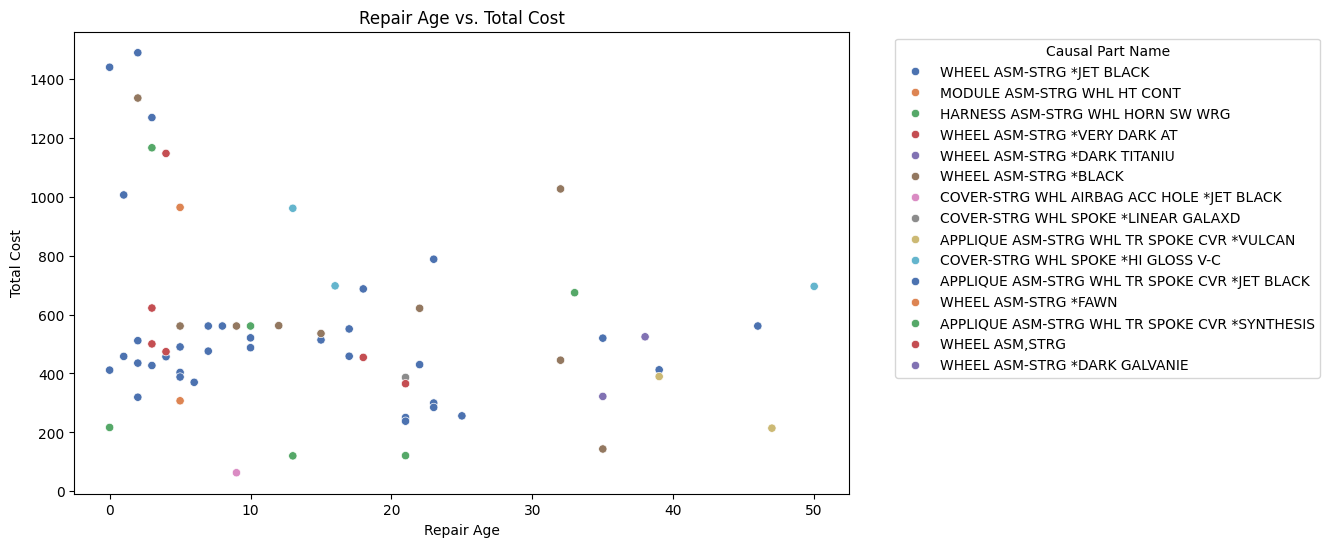

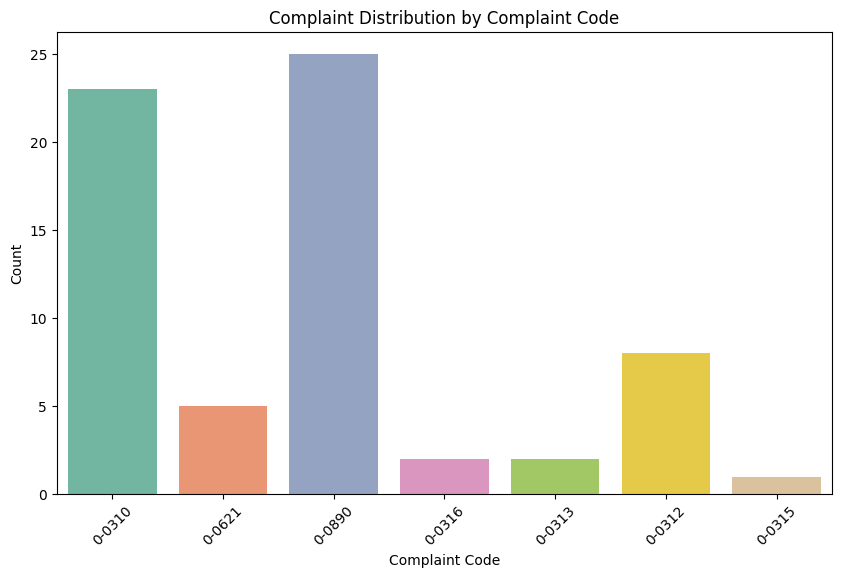

In [164]:
# Visualizing the data and insights
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar plot: TotalCOST by CAUSAL_PART_NM
plt.figure(figsize=(10, 6))
sns.barplot(x='TOTALCOST', y='CAUSAL_PART_NM', data=df, palette='viridis')
plt.title('Total Repair Cost by Causal Part Name')
plt.xlabel('Total Cost')
plt.ylabel('Causal Part Name')
plt.show()

# 2. Bar plot: TotalCOST by REPAIRING_DEALER_NAME
plt.figure(figsize=(12, 10))
sns.barplot(x='TOTALCOST', y='DEALER_NAME', data=df, palette='coolwarm')
plt.title('Total Repair Cost by Repairing Dealer')
plt.xlabel('Total Cost')
plt.ylabel('Repairing Dealer Name')
plt.show()

# 3. Line plot: Repair Cost over REPAIR_DATE
plt.figure(figsize=(10, 6))
sns.lineplot(x='REPAIR_DATE', y='TOTALCOST', data=df, marker='o', color='b')
plt.title('Total Repair Cost Over Time')
plt.xlabel('Repair Date')
plt.ylabel('Total Cost')
plt.show()

# 4. Scatter plot: Repair Age vs. Total Cost
# This plot can reveal if older repairs tend to have higher or lower costs.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='REPAIR_AGE', y='TOTALCOST', data=df, hue='CAUSAL_PART_NM', palette='deep')
plt.title('Repair Age vs. Total Cost')
plt.xlabel('Repair Age')
plt.ylabel('Total Cost')
plt.legend(title='Causal Part Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. Bar plot: Complaint Distribution by Complaint Code
# Visualizing how many repairs fall under each complaint category

plt.figure(figsize=(10, 6))
sns.countplot(x='COMPLAINT_CD', data=df, palette='Set2')
plt.title('Complaint Distribution by Complaint Code')
plt.xlabel('Complaint Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [165]:
import pandas as pd
import re

# Defining keywords for generating tags
failure_keywords = ['faulty', 'broken', 'not working', 'issue', 'damaged', 'malfunction', 'failure']
component_keywords = ['steering wheel', 'module', 'assembly', 'sensor', 'brake', 'motor control']
action_keywords = ['replaced', 'repaired', 'checked', 'installed', 'tested', 'reprogrammed', 'fixed']

# Function to extract tags based on keyword matching
def extract_tags(text, keywords):
    tags = []
    for keyword in keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE):
            tags.append(keyword)
    return tags

# Applying the function to both CORRECTION_VERBATIM and CUSTOMER_VERBATIM columns
df['Failure Conditions (Correction)'] = df['CORRECTION_VERBATIM'].apply(lambda x: extract_tags(x, failure_keywords))
df['Components (Correction)'] = df['CORRECTION_VERBATIM'].apply(lambda x: extract_tags(x, component_keywords))
df['Actions Taken (Correction)'] = df['CORRECTION_VERBATIM'].apply(lambda x: extract_tags(x, action_keywords))

df['Failure Conditions (Customer)'] = df['CUSTOMER_VERBATIM'].apply(lambda x: extract_tags(x, failure_keywords))
df['Components (Customer)'] = df['CUSTOMER_VERBATIM'].apply(lambda x: extract_tags(x, component_keywords))
df['Actions Taken (Customer)'] = df['CUSTOMER_VERBATIM'].apply(lambda x: extract_tags(x, action_keywords))

# Displaying the tags
df[['CORRECTION_VERBATIM', 'Failure Conditions (Correction)', 'Components (Correction)', 'Actions Taken (Correction)',
    'CUSTOMER_VERBATIM', 'Failure Conditions (Customer)', 'Components (Customer)', 'Actions Taken (Customer)']]

,CORRECTION_VERBATIM,Failure Conditions (Correction),Components (Correction),Actions Taken (Correction),CUSTOMER_VERBATIM,Failure Conditions (Customer),Components (Customer),Actions Taken (Customer)
0,REPLACED STEERING WHEEL NOW OKAY,[],[steering wheel],[replaced],STEERING WHEEL COMING APART,[],[steering wheel],[]
1,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,[faulty],[module],"[checked, tested]",CUSTOMER STATES HEATED STEERING WHEEL INOP,[],[steering wheel],[]
4,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,[],[],[replaced],C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,[],[],[]
5,Remove and replace steering wheel wire harness,[],[steering wheel],[],Horn and steering wheel switches are inoperable,[],[steering wheel],[]
6,"ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...",[],[module],[replaced],CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...,[],[],[]
...,...,...,...,...,...,...,...,...
92,removed and replaced steering wheel,[],[steering wheel],[replaced],CUSTOMER STATES NEW HEATED STEERING WHEEL INST...,[],[steering wheel],[installed]
93,INSPECTED STEERING WHEEL AND FOUND LEATHER UND...,[],[steering wheel],[],RE&RE STEERING WHEEL. PART IS HERE,[],[steering wheel],[]
94,REPLACED APPLIQUE,[],[],[replaced],CUSTOMER STATES THE FINISH ON THE STEERING WHE...,[],[steering wheel],[]
95,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,[],[steering wheel],[replaced],CUSTOMER STATES that the steering is very tigh...,[],[],[]


In [166]:
# Function to convert list to a clean string without brackets or apostrophes
def clean_tags(tags_list):
    return ', '.join(tags_list)

# Applying the function to clean the new columns
df['Failure Conditions (Correction)'] = df['Failure Conditions (Correction)'].apply(clean_tags)
df['Components (Correction)'] = df['Components (Correction)'].apply(clean_tags)
df['Actions Taken (Correction)'] = df['Actions Taken (Correction)'].apply(clean_tags)

df['Failure Conditions (Customer)'] = df['Failure Conditions (Customer)'].apply(clean_tags)
df['Components (Customer)'] = df['Components (Customer)'].apply(clean_tags)
df['Actions Taken (Customer)'] = df['Actions Taken (Customer)'].apply(clean_tags)

# Displaying the updated DataFrame
df[['CORRECTION_VERBATIM', 'Failure Conditions (Correction)', 'Components (Correction)', 'Actions Taken (Correction)',
    'CUSTOMER_VERBATIM', 'Failure Conditions (Customer)', 'Components (Customer)', 'Actions Taken (Customer)']]


,CORRECTION_VERBATIM,Failure Conditions (Correction),Components (Correction),Actions Taken (Correction),CUSTOMER_VERBATIM,Failure Conditions (Customer),Components (Customer),Actions Taken (Customer)
0,REPLACED STEERING WHEEL NOW OKAY,,steering wheel,replaced,STEERING WHEEL COMING APART,,steering wheel,
1,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,faulty,module,"checked, tested",CUSTOMER STATES HEATED STEERING WHEEL INOP,,steering wheel,
4,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,,,replaced,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,,,
5,Remove and replace steering wheel wire harness,,steering wheel,,Horn and steering wheel switches are inoperable,,steering wheel,
6,"ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...",,module,replaced,CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...,,,
...,...,...,...,...,...,...,...,...
92,removed and replaced steering wheel,,steering wheel,replaced,CUSTOMER STATES NEW HEATED STEERING WHEEL INST...,,steering wheel,installed
93,INSPECTED STEERING WHEEL AND FOUND LEATHER UND...,,steering wheel,,RE&RE STEERING WHEEL. PART IS HERE,,steering wheel,
94,REPLACED APPLIQUE,,,replaced,CUSTOMER STATES THE FINISH ON THE STEERING WHE...,,steering wheel,
95,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,,steering wheel,replaced,CUSTOMER STATES that the steering is very tigh...,,,


In [171]:
# Exporting the tagged data
df.to_excel('tagged_Task_2.xlsx', index=False)